C:\Users\SURFACE\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


                            OLS Regression Results                            
Dep. Variable:                outcome   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     26.67
Date:                Thu, 30 Mar 2023   Prob (F-statistic):            0.00418
Time:                        18:47:57   Log-Likelihood:                -24.227
No. Observations:                   8   AIC:                             56.45
Df Residuals:                       4   BIC:                             56.77
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        105.0000      5.000     21.

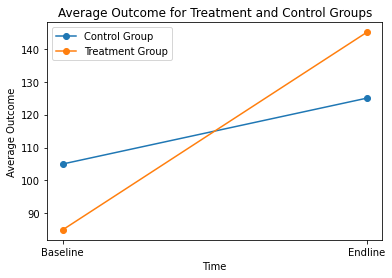

In [2]:
#import libraries
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

# Create a dummy dataframe with id, treatment, time, and outcome variables
data = {'id': [1, 1, 2, 2, 3, 3, 4, 4],
        'treatment': [0, 0, 0, 0, 1, 1, 1, 1],
        'time': [0, 1, 0, 1, 0, 1, 0, 1],
        'outcome': [100, 120, 110, 130, 80, 140, 90, 150]}

df = pd.DataFrame(data)

# Create an interaction term between treatment and time variables
df['treatment_time'] = df['treatment'] * df['time']

# Perform the difference-in-differences regression
did_regression = smf.ols('outcome ~ treatment + time + treatment_time', data=df).fit()

# Print regression results
print(did_regression.summary())

# Calculate average outcomes for treatment and control groups at baseline and endline
grouped_df = df.groupby(['treatment', 'time'])['outcome'].mean().reset_index()

# Plot the average outcomes
plt.plot(grouped_df[grouped_df['treatment'] == 0]['time'],
         grouped_df[grouped_df['treatment'] == 0]['outcome'],
         label='Control Group', marker='o')

plt.plot(grouped_df[grouped_df['treatment'] == 1]['time'],
         grouped_df[grouped_df['treatment'] == 1]['outcome'],
         label='Treatment Group', marker='o')

plt.xlabel('Time')
plt.ylabel('Average Outcome')
plt.xticks([0, 1], ['Baseline', 'Endline'])
plt.title('Average Outcome for Treatment and Control Groups')
plt.legend()

plt.show()
